In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from rxn_ca.core import ReactionResult
from rxn_ca.analysis import ReactionAnalyzer
from rxn_ca.computing.schemas.ca_result_schema import RxnCAResultDoc
from rxn_ca.analysis.bulk_reaction_analyzer import BulkReactionAnalyzer
from rxn_ca import get_scored_rxns
from rxn_ca.core.heating import HeatingSchedule, HeatingStep

Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0


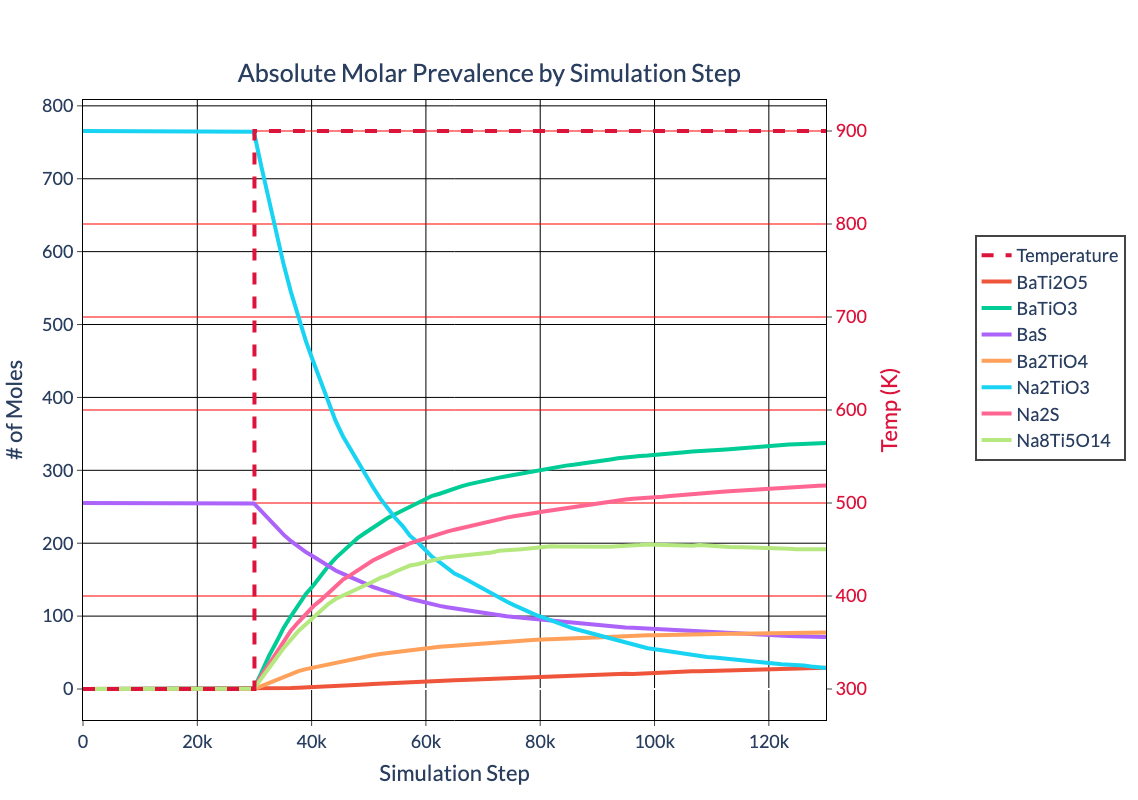

In [10]:
analyzer = BulkReactionAnalyzer.from_result_doc_file("matt_recipe-2023-12-21-085530.json")
analyzer.plot_molar_phase_amounts()

Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0
Constructing result from diffs: 100%|█| 130002/130002 [00:00<00:0


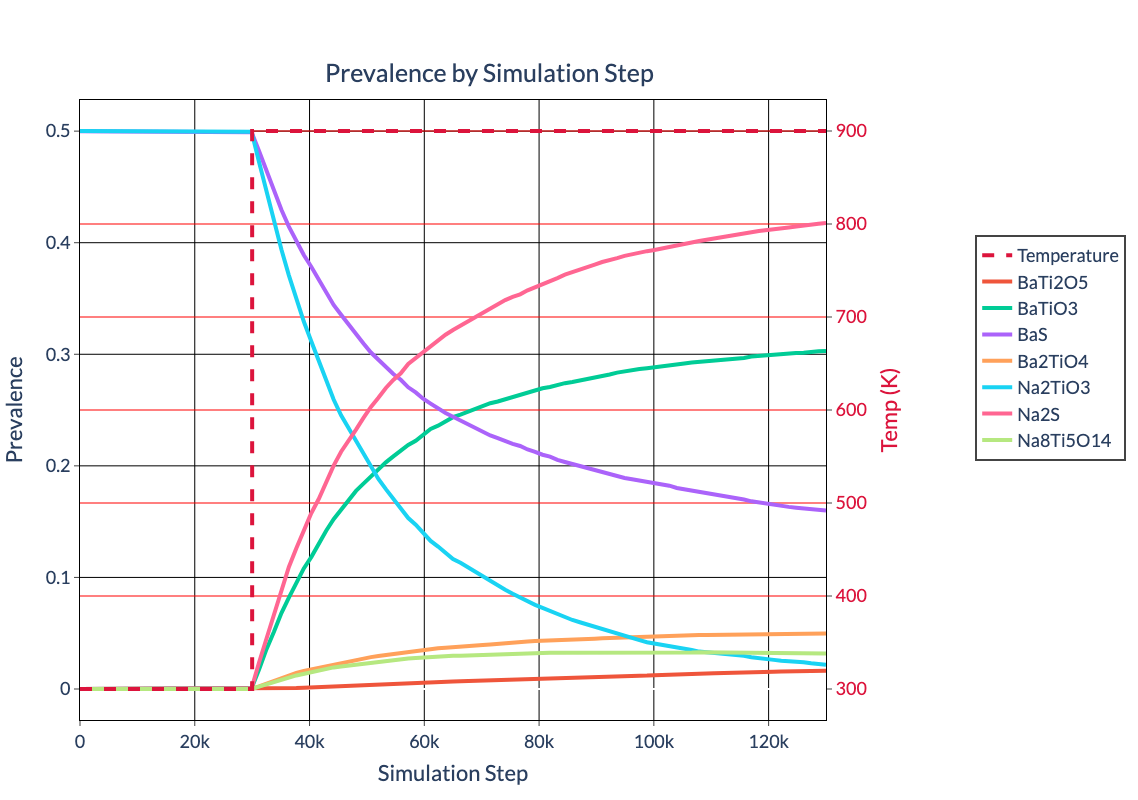

In [4]:
analyzer.plot_mole_fractions()

[autoreload of pymatgen.core.units failed: Traceback (most recent call last):
  File "/Users/mgallant/anaconda3/envs/cms/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/mgallant/anaconda3/envs/cms/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/mgallant/anaconda3/envs/cms/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/mgallant/anaconda3/envs/cms/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/Users/mgallant/anaconda3/envs/cms/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/mgallant/anaconda3/envs/cms/lib/python3.10/site-packages/IPython/extensions/autoreload.py

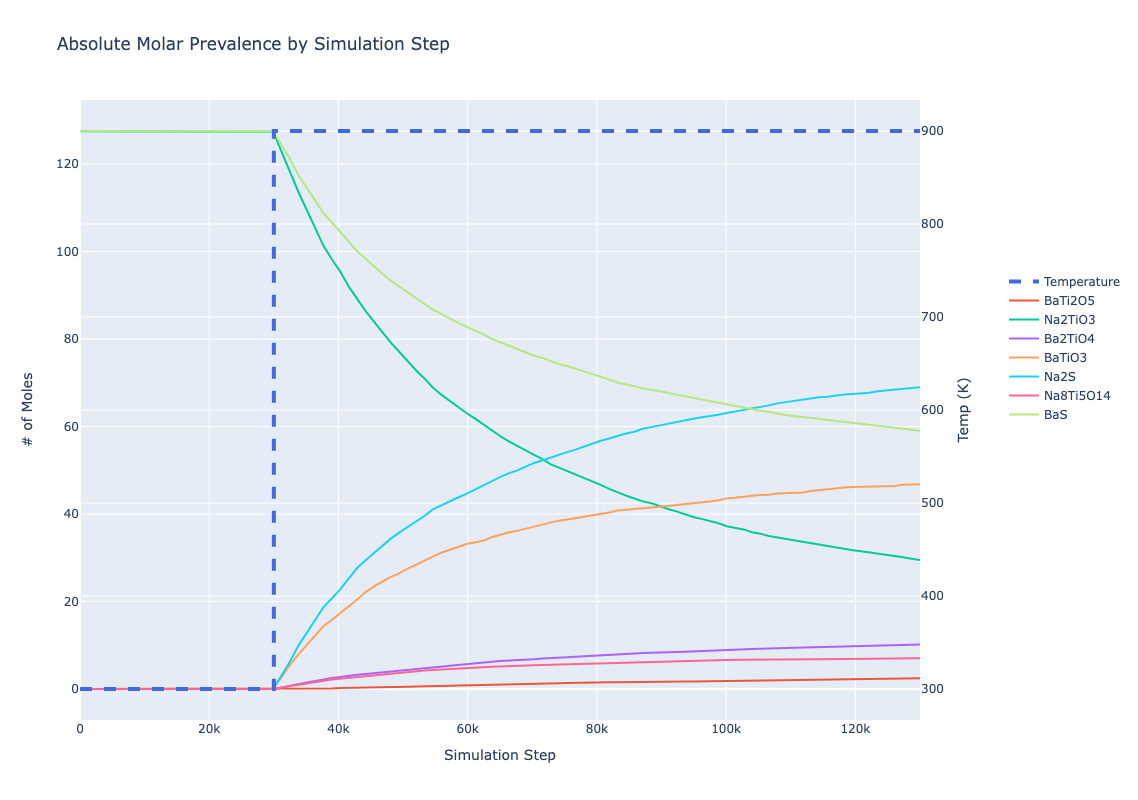

In [9]:
analyzer = BulkReactionAnalyzer.from_result_doc_file("2023-09-05-165318.json")
analyzer.plot_molar_phase_amounts(min_prevalence=1, xrd_adjust=False)

In [11]:
ys = analyzer.get_mole_trace("BaTiO3")

Constructing result from diffs: 100%|█| 130000/130000 [00:00<00:00, 1205995.52i
Constructing result from diffs: 100%|█| 130000/130000 [00:00<00:00, 1216193.14i
Constructing result from diffs: 100%|█| 130000/130000 [00:00<00:00, 1167856.86i
Constructing result from diffs: 100%|█| 130000/130000 [00:00<00:00, 1215247.15i
Constructing result from diffs: 100%|█| 130000/130000 [00:00<00:00, 1209797.85i


In [12]:
ys

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.54590327e-02, 1.54590327e-02, 3.09180653e-02,
       3.09180653e-02, 3.09180653e-02, 6.18361307e-02, 6.18361307e-02,
       6.18361307e-02, 7.72951634e-02, 7.72951634e-02, 7.72951634e-02,
       7.72951634e-02, 9.27541960e-02, 1.08213229e-01, 1.08213229e-01,
       2.72206693e+00, 5.50469281e+00, 7.91715111e+00, 1.00244743e+01,
       1.22410739e+01, 1.44057597e+01, 1.58326714e+01, 1.73220545e+01,
       1.89458882e+01, 2.04795220e+01, 2.21531363e+01, 2.34749595e+01,
       2.45312108e+01, 2.56353303e+01, 2.64421756e+01, 2.75266415e+01,
       2.84086556e+01, 2.92459278e+01, 3.02660032e+01, 3.11507283e+01,
       3.17542659e+01, 3.24552383e+01, 3.31577793e+01, 3.35785767e+01,
       3.38894276e+01, 3.46800552e+01, 3.52372872e+01, 3.57666475e+01,
       3.61569548e+01, 3.66532092e+01, 3.71233311e+01, 3.75121472e+01,
      

In [20]:
import matplotlib.pyplot as plt
import numpy as np

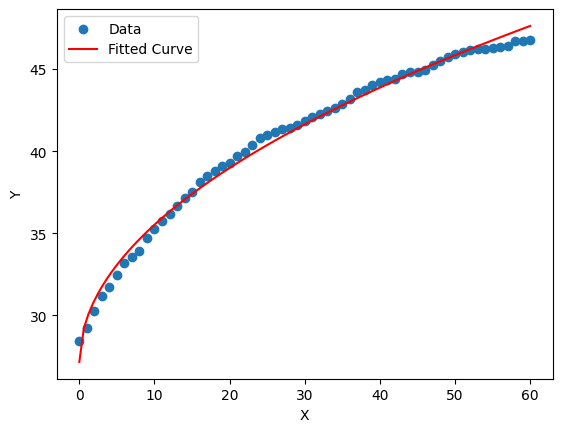

In [85]:
from scipy.optimize import curve_fit
def square_root_function(x, a, b):
    return a * np.sqrt(x) + b

trimmed_ys = ys[40:]
xs = range(0, len(trimmed_ys))

params, covariance = curve_fit(square_root_function, xs, trimmed_ys)

# Extract the fitted parameters
a_fit, b_fit = params

x_fit = np.linspace(min(xs), max(xs), 100)  # Generate points for the fitted curve
y_fit = square_root_function(x_fit, a_fit, b_fit)

plt.scatter(xs, trimmed_ys, label='Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

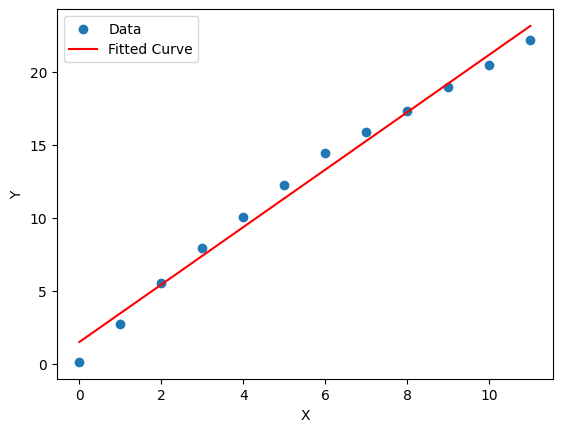

In [89]:
from scipy.optimize import curve_fit
def line(x, a, b):
    return a * x + b

trimmed_ys = ys[23:35]
xs = range(0, len(trimmed_ys))

params, covariance = curve_fit(line, xs, trimmed_ys)

# Extract the fitted parameters
a_fit, b_fit = params

x_fit = np.linspace(min(xs), max(xs), 100)  # Generate points for the fitted curve
y_fit = line(x_fit, a_fit, b_fit)

plt.scatter(xs, trimmed_ys, label='Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()